In [11]:
import pandas as pd
import numpy as np
from pct.tree.heuristic.Heuristic import Heuristic5
from pct.tree.heuristic.NumericHeuristic import NumericHeuristic5
from pct.tree.splitter.splitter import Splitter
from pct.tree.treewithxindex import Tree
# from pct.tree.ftest.ftest import FTest


## From YXH's data process

In [3]:

from sklearn.preprocessing import LabelEncoder

# Load the u.data dataset
u_data = pd.read_csv('C:/Users/13447/Desktop/Stats thesis/ml-100k/u.data', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

# # Perform label encoding on user_id and item_id
# user_encoder = LabelEncoder()
# item_encoder = LabelEncoder()

# u_data['user_id'] = user_encoder.fit_transform(u_data['user_id'])
# u_data['item_id'] = item_encoder.fit_transform(u_data['item_id'])

# # Create the rating matrix
# n_users = u_data['user_id'].nunique()
# n_items = u_data['item_id'].nunique()

# Define the threshold
THRESHOLD = 3  # Ratings above this are "Lovers", below are "Haters"

# Pivot the data
rating_matrix = u_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
# rating_matrix.index = u_data['user_id'].unique()  # Ensure user_id alignment
# rating_matrix.columns = u_data['item_id'].unique()  # Ensure item_id alignment


# Apply threshold classification to the rating matrix (after thresholding)
rating_matrix_thresholded = np.where(rating_matrix > THRESHOLD, 1, np.where(rating_matrix > 0, -1, 0))

# Convert numpy array to pandas DataFrame for easier inspection
rating_matrix_thresholded_df = pd.DataFrame(rating_matrix_thresholded)


# Create rI and rU indexes for training set (R)
# rI: item to user ratings (dictionary of items with lists of user ratings)
rI = {}
for _, row in u_data.iterrows():
    item_id = row['item_id']
    user_id = row['user_id']
    rating = row['rating']
    if item_id not in rI:
        rI[item_id] = []
    rI[item_id].append((user_id, rating))

# rU: user to item ratings (dictionary of users with lists of item ratings)
rU = {}
for _, row in u_data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    if user_id not in rU:
        rU[user_id] = []
    rU[user_id].append((item_id, rating))

In [4]:
u_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [11]:
# find and count users who have rated item 246 and their ratings
item_id = 55
print(f"Users who have rated item {item_id} and their ratings:")
print(rI[item_id])

# count users who have rated item 246 and their ratings
print(f"Number of users who have rated item {item_id}: {len(rI[item_id])}")




Users who have rated item 55 and their ratings:
[(308, 3), (16, 5), (216, 5), (197, 3), (37, 3), (137, 5), (267, 4), (44, 4), (251, 3), (339, 3), (130, 5), (343, 3), (352, 1), (315, 5), (248, 4), (87, 4), (328, 4), (293, 4), (363, 5), (286, 4), (303, 4), (371, 4), (249, 5), (269, 4), (178, 4), (49, 4), (142, 2), (347, 5), (94, 4), (246, 4), (268, 4), (393, 4), (195, 4), (387, 3), (62, 5), (327, 4), (110, 3), (24, 5), (296, 5), (416, 2), (479, 4), (177, 3), (59, 5), (183, 4), (425, 4), (262, 3), (429, 4), (118, 5), (207, 3), (291, 4), (109, 2), (297, 4), (198, 3), (218, 4), (158, 4), (545, 3), (405, 1), (445, 1), (506, 4), (23, 4), (144, 4), (346, 5), (524, 2), (645, 3), (135, 4), (650, 4), (619, 1), (653, 3), (551, 5), (92, 3), (299, 2), (559, 4), (487, 5), (454, 2), (417, 5), (627, 4), (577, 3), (756, 5), (583, 4), (361, 2), (466, 4), (399, 2), (221, 4), (442, 3), (145, 3), (447, 4), (846, 5), (826, 5), (213, 5), (655, 2), (102, 3), (606, 4), (250, 5), (629, 4), (823, 4), (632, 2), (9

In [7]:
rating_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# rating_matrix_thresholded_df.head()

In [18]:
# Optionally, print rI and rU to check the data structure for training and testing
print("\nSample rI (item to user ratings) for Training Set:")
for item in list(rI.keys())[:2]:  # Display sample item indices
    print(f"Item {item}: {rI[item]}")

print("\nSample rU (user to item ratings) for Training Set:")
for user in list(rU.keys())[:2]:  # Display sample user indices
    print(f"User {user}: {rU[user]}")


Sample rI (item to user ratings) for Training Set:
Item 241: [(np.int64(195), np.int64(3)), (np.int64(62), np.int64(3)), (np.int64(225), np.int64(5)), (np.int64(153), np.int64(3)), (np.int64(305), np.int64(5)), (np.int64(295), np.int64(4)), (np.int64(33), np.int64(5)), (np.int64(270), np.int64(4)), (np.int64(200), np.int64(4)), (np.int64(208), np.int64(4)), (np.int64(34), np.int64(2)), (np.int64(353), np.int64(5)), (np.int64(198), np.int64(5)), (np.int64(112), np.int64(2)), (np.int64(0), np.int64(5)), (np.int64(172), np.int64(5)), (np.int64(359), np.int64(4)), (np.int64(233), np.int64(4)), (np.int64(13), np.int64(4)), (np.int64(308), np.int64(4)), (np.int64(330), np.int64(4)), (np.int64(20), np.int64(3)), (np.int64(110), np.int64(4)), (np.int64(438), np.int64(5)), (np.int64(354), np.int64(4)), (np.int64(203), np.int64(5)), (np.int64(144), np.int64(5)), (np.int64(29), np.int64(5)), (np.int64(462), np.int64(2)), (np.int64(143), np.int64(4)), (np.int64(416), np.int64(3)), (np.int64(1), n

## initiate tree and splitter

In [13]:
tree = Tree(min_instances=2)
tree.fit(rating_matrix, u_data['rating'], target_weights=None, rI=rI, rU=rU)




✅ Converted x and y to DataFrame
✅ Assigned x and y
✅ Creating target weights...
✅ Identifying numerical and categorical attributes...
✅ Creating Splitter...
Initializing Splitter...
✅ Calling build()...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  599
👥 Users who rated item 599: 1
❤️ Lovers: 0
💔 Haters: 943
❓ Unknowns: 0
🔄 Recursively building tree for subsets...
Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]
Index: []

[0 rows x 1682 columns]
....................
Empty DataFrame
Columns: [rating]
Index: []
🌲 Building predictive clustering tree...
🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  711


KeyError: 0

In [14]:
tree.print_tree_structure()

Node: 5_8
Attribute: 5
Criterion: [0.]
Leaf Node: No
Children:
    Node: leaf_9=[3.] (1.0)
    Attribute: None
    Criterion: None
    Leaf Node: No
    Children:
        Node: 5_8
        Attribute: 5
        Criterion: [0.]
        Leaf Node: No
        Children:
            Node: leaf_9=[3.] (1.0)
            Attribute: None
            Criterion: None
            Leaf Node: No
            Children:
                Node: 5_8
                Attribute: 5
                Criterion: [0.]
                Leaf Node: No
                Children:
                    Node: leaf_9=[3.] (1.0)
                    Attribute: None
                    Criterion: None
                    Leaf Node: No
                    Children:
                        Node: 5_8
                        Attribute: 5
                        Criterion: [0.]
                        Leaf Node: No
                        Children:
                        Node: 5_8
                        Attribute: 5
                 

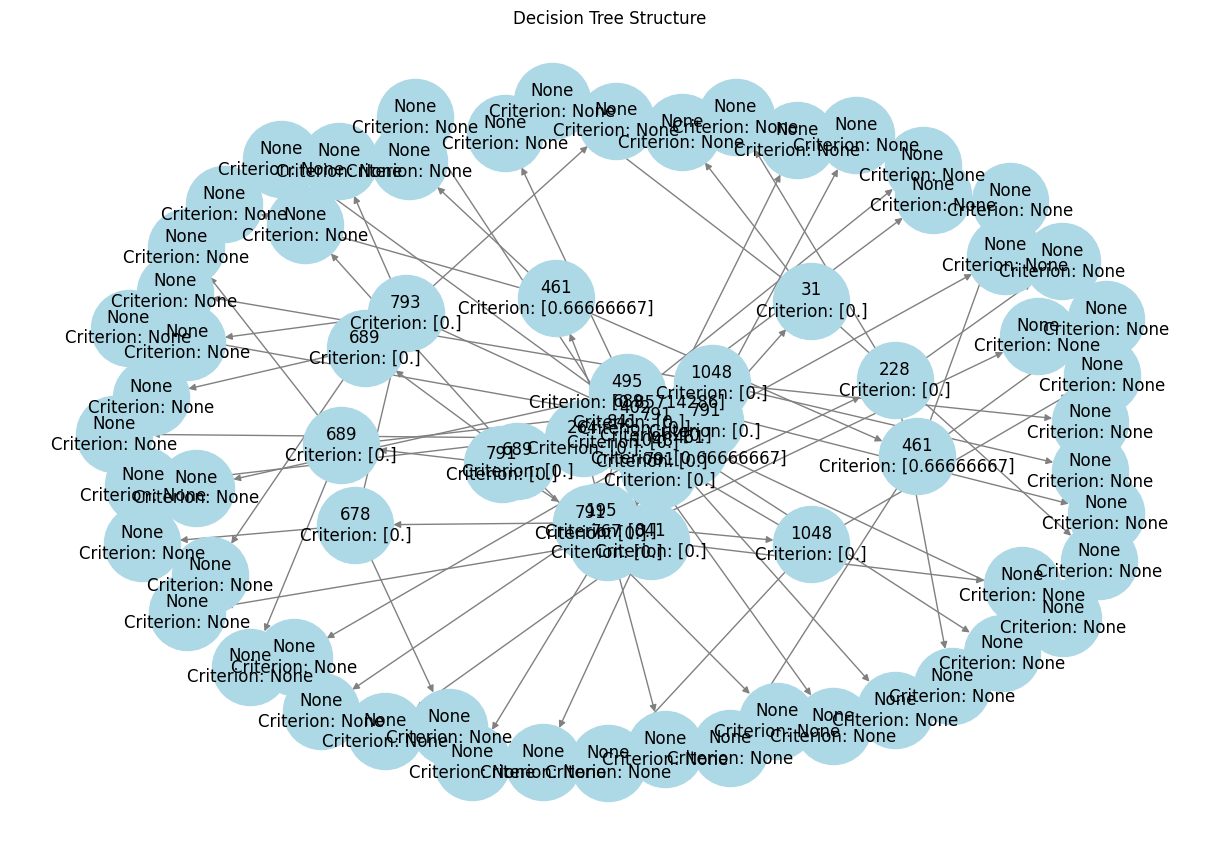

In [5]:
tree.visualize_tree()
